# SaaS Business Analytics: Exploratory Data Analysis

**Project Overview**
- Project Name: subscription-analytics-platform
- Data Source: AWS SaaS Sales Dataset (Kaggle)
- Objective: Comprehensive exploratory data analysis of subscription and sales data

## 1. Environment Setup and Library Imports

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Time handling
from datetime import datetime, timedelta

# Statistical analysis
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Style settings
plt.style.use('default')  # Use default style as seaborn-v0_8 might not be available
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


## 2. Data Loading and Initial Inspection

### 2.1 Data Loading

In [26]:
# Load the dataset
df = pd.read_csv('../data/raw/saas_sales.csv')

# Basic dataset information
print("Dataset shape:", df.shape)
print("\nColumn data types:")
print(df.dtypes)
print("\nFirst 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())
print("\nDataset info:")
print(df.info())

Dataset shape: (9994, 19)

Column data types:
Row ID            int64
Order ID         object
Order Date       object
Date Key          int64
Contact Name     object
Country          object
City             object
Region           object
Subregion        object
Customer         object
Customer ID       int64
Industry         object
Segment          object
Product          object
License          object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

First 5 rows:
   Row ID          Order ID  Order Date  Date Key    Contact Name  \
0       1  EMEA-2022-152156   11/9/2022  20221109     Nathan Bell   
1       2  EMEA-2022-152156   11/9/2022  20221109     Nathan Bell   
2       3  AMER-2022-138688   6/13/2022  20220613  Deirdre Bailey   
3       4  EMEA-2021-108966  10/11/2021  20211011      Zoe Hodges   
4       5  EMEA-2021-108966  10/11/2021  20211011      Zoe Hodges   

         Country           City Region Subregion      

### 2.2 Data Quality Assessment

In [7]:
# Missing values analysis
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percentage
}).sort_values('Missing_Percentage', ascending=False)

print("Missing Values Summary:")
print(missing_df[missing_df['Missing_Count'] > 0])

# Duplicate records check
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate records: {duplicate_count}")

# Data types validation
print("\nData types summary:")
print(df.dtypes.value_counts())

Missing Values Summary:
Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []

Duplicate records: 0

Data types summary:
object     12
int64       4
float64     3
dtype: int64


## 3. Data Cleaning and Preprocessing

### 3.1 Column Analysis and Renaming

In [8]:
# Display column names
print("Column names:")
print(df.columns.tolist())

# Check for any column name issues
print("\nColumn name issues check:")
print("Spaces in column names:", any(' ' in col for col in df.columns))
print("Special characters:", any(char in col for col in df.columns for char in ['/', '\\', '(', ')', '%']))

# Standardize column names if needed
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('/', '_')

Column names:
['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name', 'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID', 'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity', 'Discount', 'Profit']

Column name issues check:
Spaces in column names: True
Special characters: False


### 3.2 Date Columns Processing

In [9]:
# Identify date columns
date_columns = []
for col in df.columns:
    if df[col].dtype == 'object':
        sample_values = df[col].dropna().head(100)
        # Check if column contains date-like strings
        if any(sample_values.astype(str).str.contains(r'\d{4}-\d{2}-\d{2}|\d{2}/\d{2}/\d{4}|\d{4}/\d{2}/\d{2}', na=False)):
            date_columns.append(col)

print("Potential date columns:", date_columns)

# Convert date columns
for col in date_columns:
    try:
        df[col] = pd.to_datetime(df[col])
        print(f"Successfully converted {col} to datetime")
    except:
        print(f"Failed to convert {col} to datetime")

Potential date columns: ['order_date']
Successfully converted order_date to datetime


## 4. Descriptive Statistics Analysis

### 4.1 Numerical Variables Summary

In [10]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:", numerical_cols)

# Descriptive statistics
print("\nDescriptive Statistics for Numerical Variables:")
print(df[numerical_cols].describe())

# Additional statistics
print("\nAdditional Statistics:")
for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Skewness: {df[col].skew():.3f}")
    print(f"  Kurtosis: {df[col].kurtosis():.3f}")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Zero values: {(df[col] == 0).sum()}")

Numerical columns: ['row_id', 'date_key', 'customer_id', 'sales', 'quantity', 'discount', 'profit']

Descriptive Statistics for Numerical Variables:
            row_id      date_key  customer_id         sales     quantity  \
count  9994.000000  9.994000e+03  9994.000000   9994.000000  9994.000000   
mean   4997.500000  2.021803e+07  1049.771963    229.858001     3.789574   
std    2885.163629  1.123898e+04    29.719388    623.245101     2.225110   
min       1.000000  2.020010e+07  1001.000000      0.444000     1.000000   
25%    2499.250000  2.021052e+07  1024.000000     17.280000     2.000000   
50%    4997.500000  2.022063e+07  1049.000000     54.490000     3.000000   
75%    7495.750000  2.023052e+07  1076.000000    209.940000     5.000000   
max    9994.000000  2.023123e+07  1101.000000  22638.480000    14.000000   

          discount       profit  
count  9994.000000  9994.000000  
mean      0.156203    28.656896  
std       0.206452   234.260108  
min       0.000000 -6599.97800

### 4.2 Categorical Variables Summary

In [11]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# Remove date columns from categorical
categorical_cols = [col for col in categorical_cols if col not in date_columns]

print("Categorical columns:", categorical_cols)

print("\nCategorical Variables Summary:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Most frequent values:")
    print(df[col].value_counts().head())

Categorical columns: ['order_id', 'contact_name', 'country', 'city', 'region', 'subregion', 'customer', 'industry', 'segment', 'product', 'license']

Categorical Variables Summary:

order_id:
  Unique values: 5009
  Most frequent values:
EMEA-2023-100111    14
EMEA-2023-157987    12
AMER-2022-165330    11
EMEA-2022-108504    11
EMEA-2021-131338    10
Name: order_id, dtype: int64

contact_name:
  Unique values: 793
  Most frequent values:
Leonard Kelly      37
Gordon Parr        34
Amelia Campbell    34
Tracey Dickens     34
Evan Ince          32
Name: contact_name, dtype: int64

country:
  Unique values: 48
  Most frequent values:
United States     2001
United Kingdom    1141
Japan              985
France             587
Canada             506
Name: country, dtype: int64

city:
  Unique values: 262
  Most frequent values:
London           922
New York City    740
Paris            537
Los Angeles      510
Toronto          431
Name: city, dtype: int64

region:
  Unique values: 3
  Most f

## 5. Subscription Analytics Specific Analysis

### 5.1 Revenue Analysis

In [12]:
# Identify revenue-related columns
revenue_cols = [col for col in df.columns if any(keyword in col.lower() 
                for keyword in ['revenue', 'amount', 'price', 'cost', 'value'])]
print("Revenue-related columns:", revenue_cols)

# Revenue distribution analysis
if revenue_cols:
    for col in revenue_cols:
        print(f"\n{col} Analysis:")
        print(f"  Total: ${df[col].sum():,.2f}")
        print(f"  Average: ${df[col].mean():,.2f}")
        print(f"  Median: ${df[col].median():,.2f}")
        print(f"  Min: ${df[col].min():,.2f}")
        print(f"  Max: ${df[col].max():,.2f}")

Revenue-related columns: []


### 5.2 Customer Segmentation Analysis

In [13]:
# Customer-related analysis
customer_cols = [col for col in df.columns if any(keyword in col.lower() 
                for keyword in ['customer', 'client', 'user', 'account'])]
print("Customer-related columns:", customer_cols)

# Customer metrics
if customer_cols:
    for col in customer_cols:
        if df[col].dtype == 'object':
            print(f"\n{col} Analysis:")
            print(f"  Unique customers: {df[col].nunique()}")
            print(f"  Top customers:")
            print(df[col].value_counts().head())

Customer-related columns: ['customer', 'customer_id']

customer Analysis:
  Unique customers: 99
  Top customers:
Allianz        192
Tyson Foods    184
Ford Motor     176
Siemens        170
Comcast        161
Name: customer, dtype: int64


### 5.3 Subscription Type Analysis

In [14]:
# Subscription-related analysis
subscription_cols = [col for col in df.columns if any(keyword in col.lower() 
                    for keyword in ['subscription', 'plan', 'service', 'product'])]
print("Subscription-related columns:", subscription_cols)

# Subscription distribution
if subscription_cols:
    for col in subscription_cols:
        if df[col].dtype == 'object':
            print(f"\n{col} Distribution:")
            print(df[col].value_counts())

Subscription-related columns: ['product']

product Distribution:
ContactMatcher                1842
Support                       1560
FinanceHub                     981
SaaS Connector Pack            957
Site Analytics                 889
Marketing Suite - Gold         846
ChatBot Plugin                 796
Data Smasher                   775
OneView                        466
SaaS Connector Pack - Gold     254
Marketing Suite                228
Storage                        217
Big Ol Database                115
Alchemy                         68
Name: product, dtype: int64


## 6. Data Visualization

### 6.1 Distribution Plots

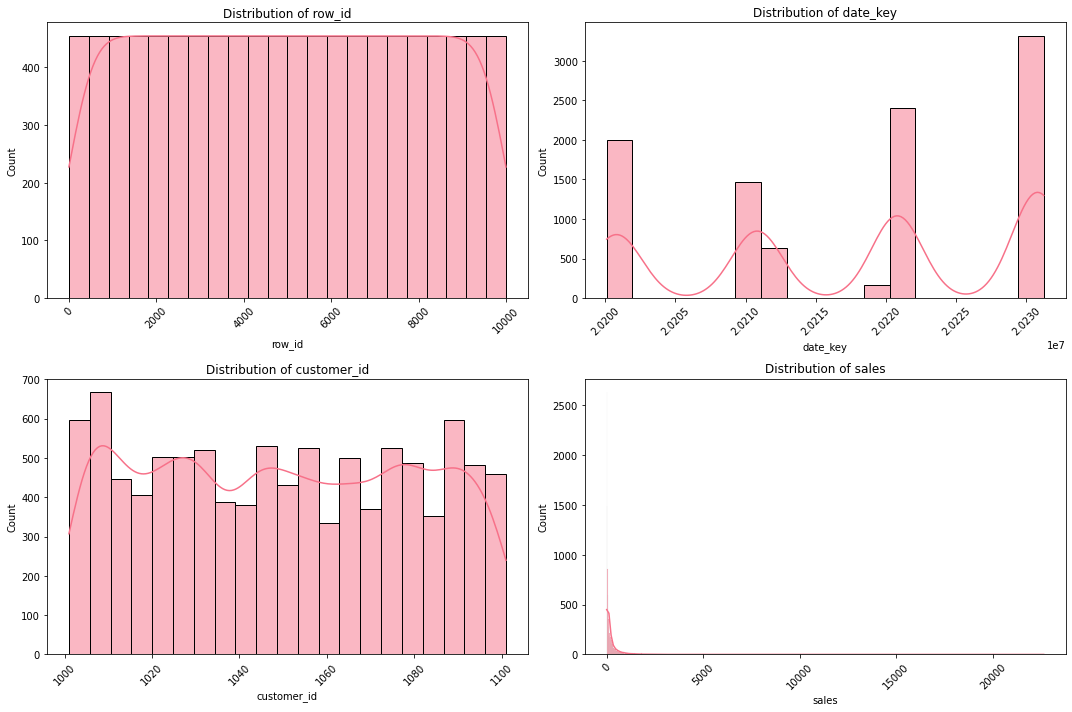

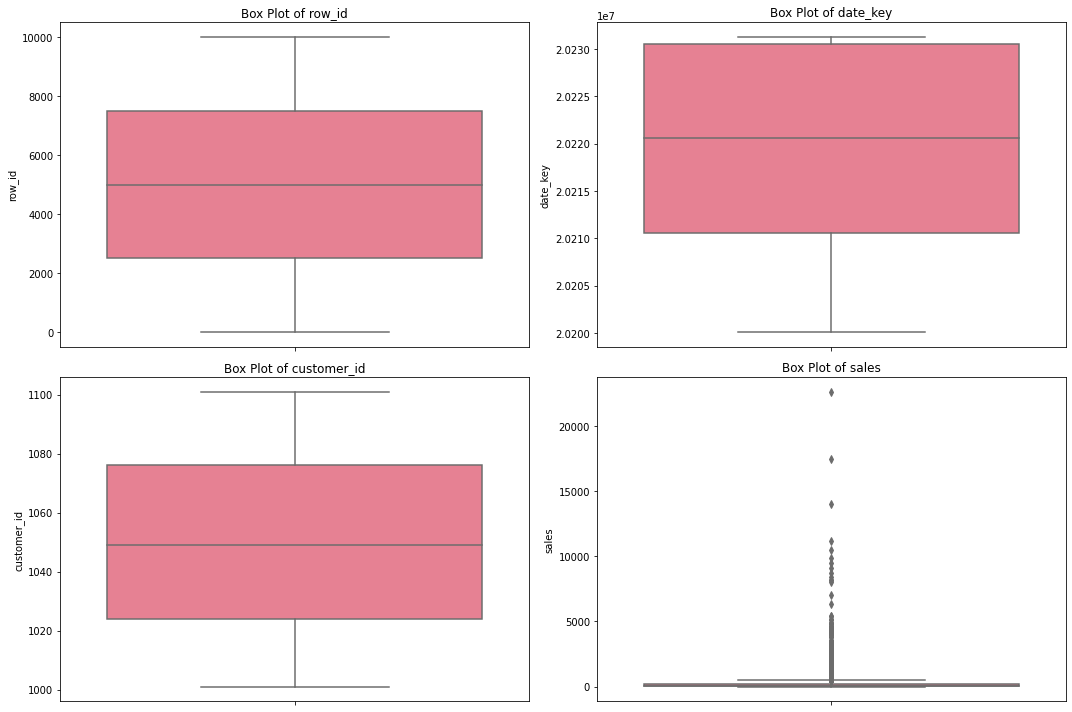

In [15]:
# Distribution plots for numerical variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols[:4]):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Box plots for outlier detection
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols[:4]):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

### 6.2 Categorical Variable Visualization

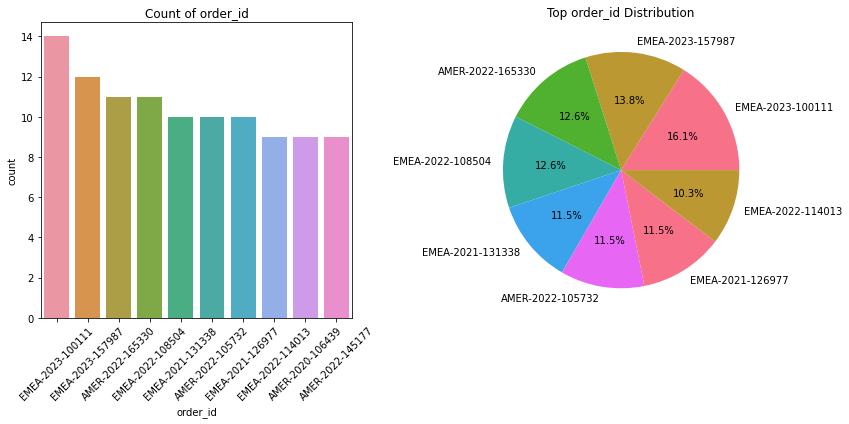

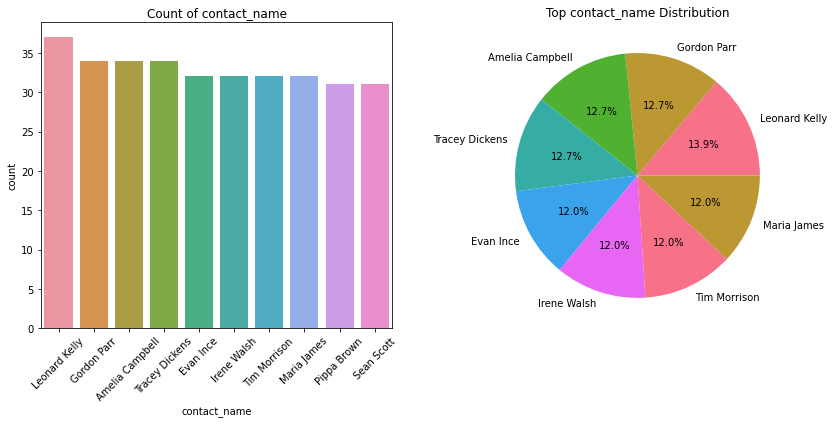

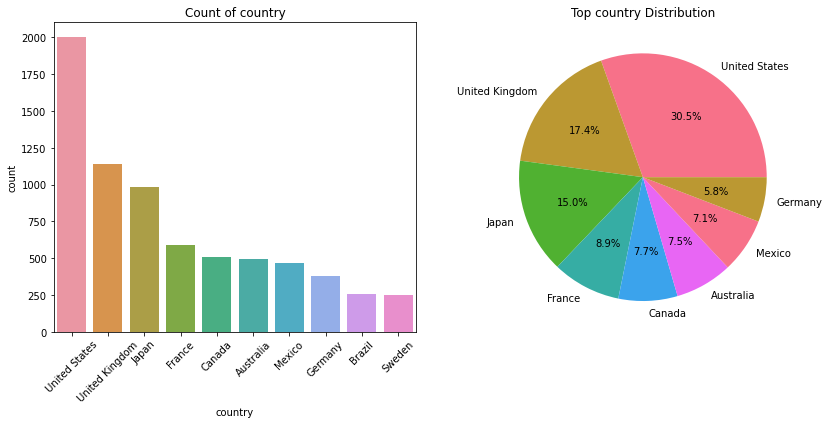

In [16]:
# Bar plots for categorical variables
for col in categorical_cols[:3]:  # Limit to first 3 categorical columns
    plt.figure(figsize=(12, 6))
    
    # Count plot
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    
    # Pie chart for top categories
    plt.subplot(1, 2, 2)
    top_categories = df[col].value_counts().head(8)
    plt.pie(top_categories.values, labels=top_categories.index, autopct='%1.1f%%')
    plt.title(f'Top {col} Distribution')
    
    plt.tight_layout()
    plt.show()

## 7. Time Series Analysis 

### 7.1 Time-based Trends


Time Series Analysis for order_date:
Date range: 2020-01-04 00:00:00 to 2023-12-31 00:00:00


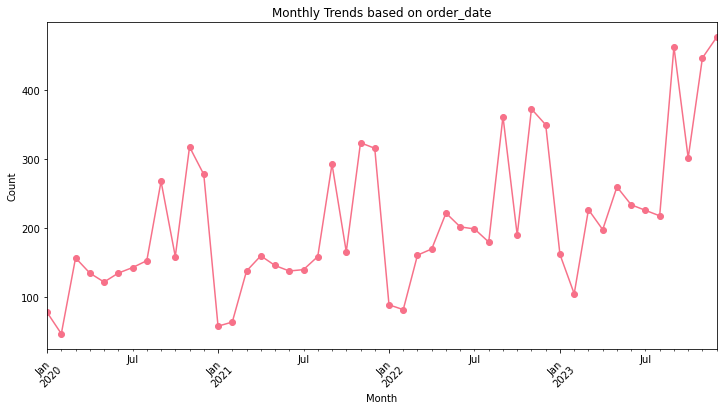

In [17]:
# Time series analysis if date columns exist
if date_columns:
    for date_col in date_columns:
        print(f"\nTime Series Analysis for {date_col}:")
        
        # Date range
        print(f"Date range: {df[date_col].min()} to {df[date_col].max()}")
        
        # Monthly trends
        df['year_month'] = df[date_col].dt.to_period('M')
        monthly_trends = df.groupby('year_month').size()
        
        plt.figure(figsize=(12, 6))
        monthly_trends.plot(kind='line', marker='o')
        plt.title(f'Monthly Trends based on {date_col}')
        plt.xlabel('Month')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

### 7.2 Seasonal Analysis

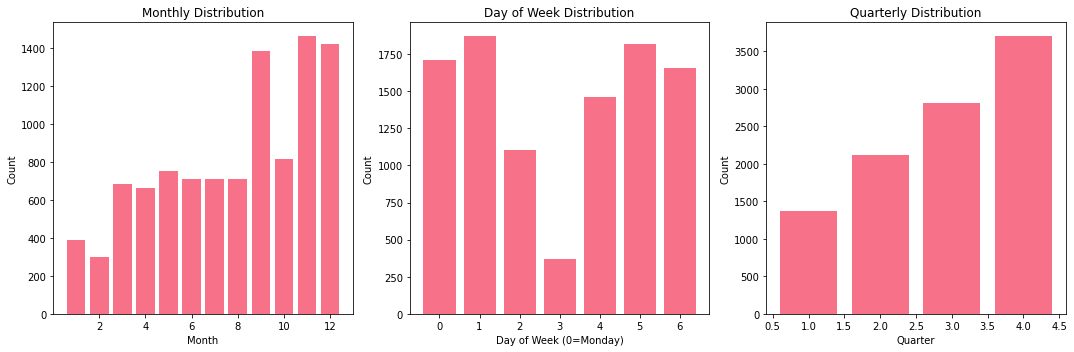

In [18]:
# Seasonal patterns
if date_columns:
    for date_col in date_columns:
        df['month'] = df[date_col].dt.month
        df['day_of_week'] = df[date_col].dt.dayofweek
        df['quarter'] = df[date_col].dt.quarter
        
        # Monthly pattern
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 3, 1)
        monthly_dist = df['month'].value_counts().sort_index()
        plt.bar(monthly_dist.index, monthly_dist.values)
        plt.title('Monthly Distribution')
        plt.xlabel('Month')
        plt.ylabel('Count')
        
        plt.subplot(1, 3, 2)
        dow_dist = df['day_of_week'].value_counts().sort_index()
        plt.bar(dow_dist.index, dow_dist.values)
        plt.title('Day of Week Distribution')
        plt.xlabel('Day of Week (0=Monday)')
        plt.ylabel('Count')
        
        plt.subplot(1, 3, 3)
        quarter_dist = df['quarter'].value_counts().sort_index()
        plt.bar(quarter_dist.index, quarter_dist.values)
        plt.title('Quarterly Distribution')
        plt.xlabel('Quarter')
        plt.ylabel('Count')
        
        plt.tight_layout()
        plt.show()

## 8. Correlation Analysis

### 8.1 Correlation Matrix

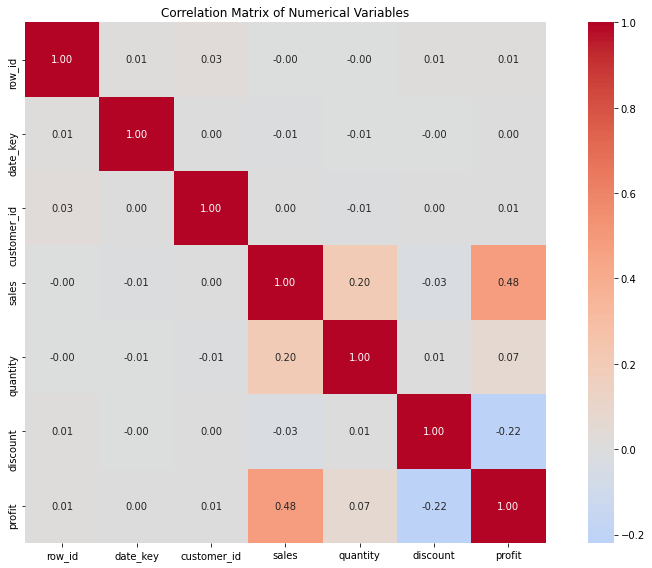

In [19]:
# Correlation matrix for numerical variables
if len(numerical_cols) > 1:
    correlation_matrix = df[numerical_cols].corr()
    
    # Heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f')
    plt.title('Correlation Matrix of Numerical Variables')
    plt.tight_layout()
    plt.show()
    
    # Find high correlations
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.5:
                high_corr_pairs.append((correlation_matrix.columns[i], 
                                      correlation_matrix.columns[j], corr_value))
    
    if high_corr_pairs:
        print("High correlation pairs (|correlation| > 0.5):")
        for pair in high_corr_pairs:
            print(f"  {pair[0]} - {pair[1]}: {pair[2]:.3f}")


## 9. Key Insights and Recommendations

### 9.1 Summary Statistics

In [22]:
# Create summary report
summary_stats = {
    'Total Records': len(df),
    'Date Range': f"{df[date_columns[0]].min()} to {df[date_columns[0]].max()}" if date_columns else "N/A",
    'Unique Customers': df[customer_cols[0]].nunique() if customer_cols else "N/A",
    'Total Revenue': f"${df[revenue_cols[0]].sum():,.2f}" if revenue_cols else "N/A",
    'Average Order Value': f"${df[revenue_cols[0]].mean():,.2f}" if revenue_cols else "N/A"
}

print("Dataset Summary:")
for key, value in summary_stats.items():
    print(f"  {key}: {value}")

Dataset Summary:
  Total Records: 9994
  Date Range: 2020-01-04 00:00:00 to 2023-12-31 00:00:00
  Unique Customers: 99
  Total Revenue: N/A
  Average Order Value: N/A


### 9.2 Data Quality Issues

In [23]:
# Identify potential data quality issues
quality_issues = []

# Check for outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    if len(outliers) > 0:
        quality_issues.append(f"{col}: {len(outliers)} outliers detected")

# Check for missing values
for col in df.columns:
    missing_pct = (df[col].isnull().sum() / len(df)) * 100
    if missing_pct > 5:
        quality_issues.append(f"{col}: {missing_pct:.1f}% missing values")

print("Potential Data Quality Issues:")
for issue in quality_issues:
    print(f"  - {issue}")

Potential Data Quality Issues:
  - sales: 1167 outliers detected
  - quantity: 170 outliers detected
  - discount: 856 outliers detected
  - profit: 1881 outliers detected


## 10. data cleaning and processing 

In [1]:
import numpy as np
import pandas as pd
#import custom modules
import sys
import os
sys.path.append(os.path.abspath(".."))
from src.data_processing import process_data, save_processed_data, get_data_summary

# Load data
df = pd.read_csv("../data/raw/saas_sales.csv")
    
# Process the data
customer_features, column_mapping = process_data(df)
    
# Save processed data
save_processed_data(customer_features)
    
# Get summary
summary = get_data_summary(customer_features)
print(summary)
    
print("Data processing module loaded successfully!")

Starting data processing...
Input dataframe shape: (9994, 19)
Input columns: ['Row ID', 'Order ID', 'Order Date', 'Date Key', 'Contact Name', 'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID', 'Industry', 'Segment', 'Product', 'License', 'Sales', 'Quantity', 'Discount', 'Profit']

Standardized columns:
['row_id', 'order_id', 'order_date', 'date_key', 'contact_name', 'country', 'city', 'region', 'subregion', 'customer', 'customer_id', 'industry', 'segment', 'product', 'license', 'sales', 'quantity', 'discount', 'profit']

Actual column mapping found: {'customer_id': 'customer', 'revenue': 'sales', 'order_date': 'order_date', 'product': 'product', 'region': 'country', 'industry': 'industry'}
DEBUG: Current dataframe columns: ['row_id', 'order_id', 'order_date', 'date_key', 'contact_name', 'country', 'city', 'region', 'subregion', 'customer', 'customer_id', 'industry', 'segment', 'product', 'license', 'sales', 'quantity', 'discount', 'profit']
DEBUG: Current column mappi

## 10. Next Steps

In [27]:
# Output for next analysis steps
steps = [
    "1. Feature Engineering: Create derived features for advanced analytics",
    "2. Customer Segmentation: Implement RFM analysis or clustering",
    "3. Predictive Modeling: Build churn prediction or CLV models",
    "4. A/B Testing Analysis: If experiment data is available",
    "5. Dashboard Creation: Build interactive dashboards for stakeholders"
]
print("Next Steps:")
for rec in steps:
    print(f"  {rec}")

Next Steps:
  1. Feature Engineering: Create derived features for advanced analytics
  2. Customer Segmentation: Implement RFM analysis or clustering
  3. Predictive Modeling: Build churn prediction or CLV models
  4. A/B Testing Analysis: If experiment data is available
  5. Dashboard Creation: Build interactive dashboards for stakeholders
